PCA and tSNE dimensionality reduction on MNIST dataset

### PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import time

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [33]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [4]:
RF_clf = RandomForestClassifier(random_state = 22)

t0 = time.time()
RF_clf.fit(X_train,y_train)
t1 = time.time()

print("Random Forest classifier training original data total time: {:.3}s".format(t1 - t0))

Random Forest classifier training original data total time: 5.51s


In [24]:
from sklearn.metrics import accuracy_score
y_pred = RF_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9473

In [26]:
# use PCA to reduce dimensionality
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)

In [27]:
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [28]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 10.03s


Training time increased. Actually dimenionality reduction not always reduce training time.

In [30]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.8908

Try using softmax function to classify the dataset.

In [34]:
# train the soft max model on the original dataset
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(solver='lbfgs',multi_class = 'multinomial')
t0=time.time()
LR_clf.fit(X_train,y_train)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 22.41s


In [38]:
y_pred = LR_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9252

In [35]:
# train the softmax model on the reduced dataset
LR_clf2 = LogisticRegression(solver='lbfgs',multi_class = 'multinomial')
t0=time.time()
LR_clf2.fit(X_train_reduced,y_train)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 7.27s


In [39]:
y_pred = LR_clf2.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.9198

Great. PCA give you formidable speedup, but not always.

### t-SNE

In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_mldata('MNIST original')

# randomly take 10000 instances as training data
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=22)
X_reduced = tsne.fit_transform(X)

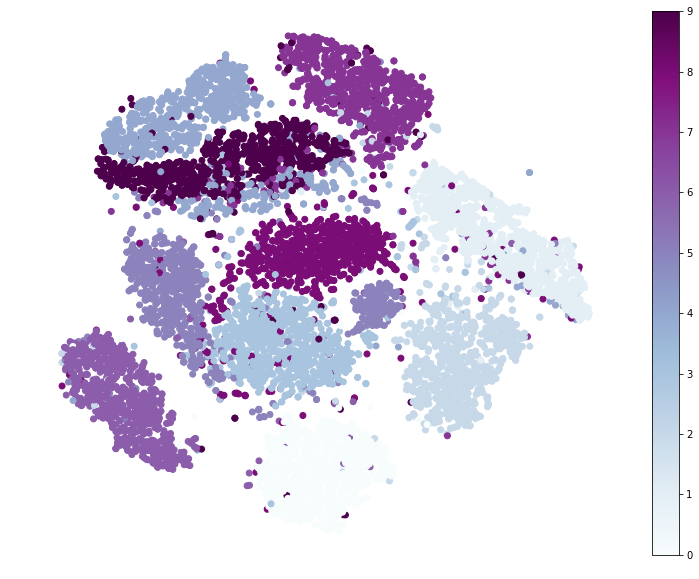

In [4]:
plt.figure(figsize = (13,10))
plt.scatter(x = X_reduced[:,0], y = X_reduced[:,1], c = y, cmap = 'BuPu')
plt.axis('off')
plt.colorbar()
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib

def plot_digits(X,y,min_distance = 0.05,images = None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]]) # initialize the neighbors array to avoid 'if'
    plt.figure(figsize=figsize)
    
    cmap = matplotlib.cm.get_cmap("jet")
    
    digits = np.unique(y)
    
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    
    ax = plt.gcf().gca()  # get current axes in current figure
    
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]    
            image = images[index].reshape(28, 28)
            imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
            ax.add_artist(imagebox)

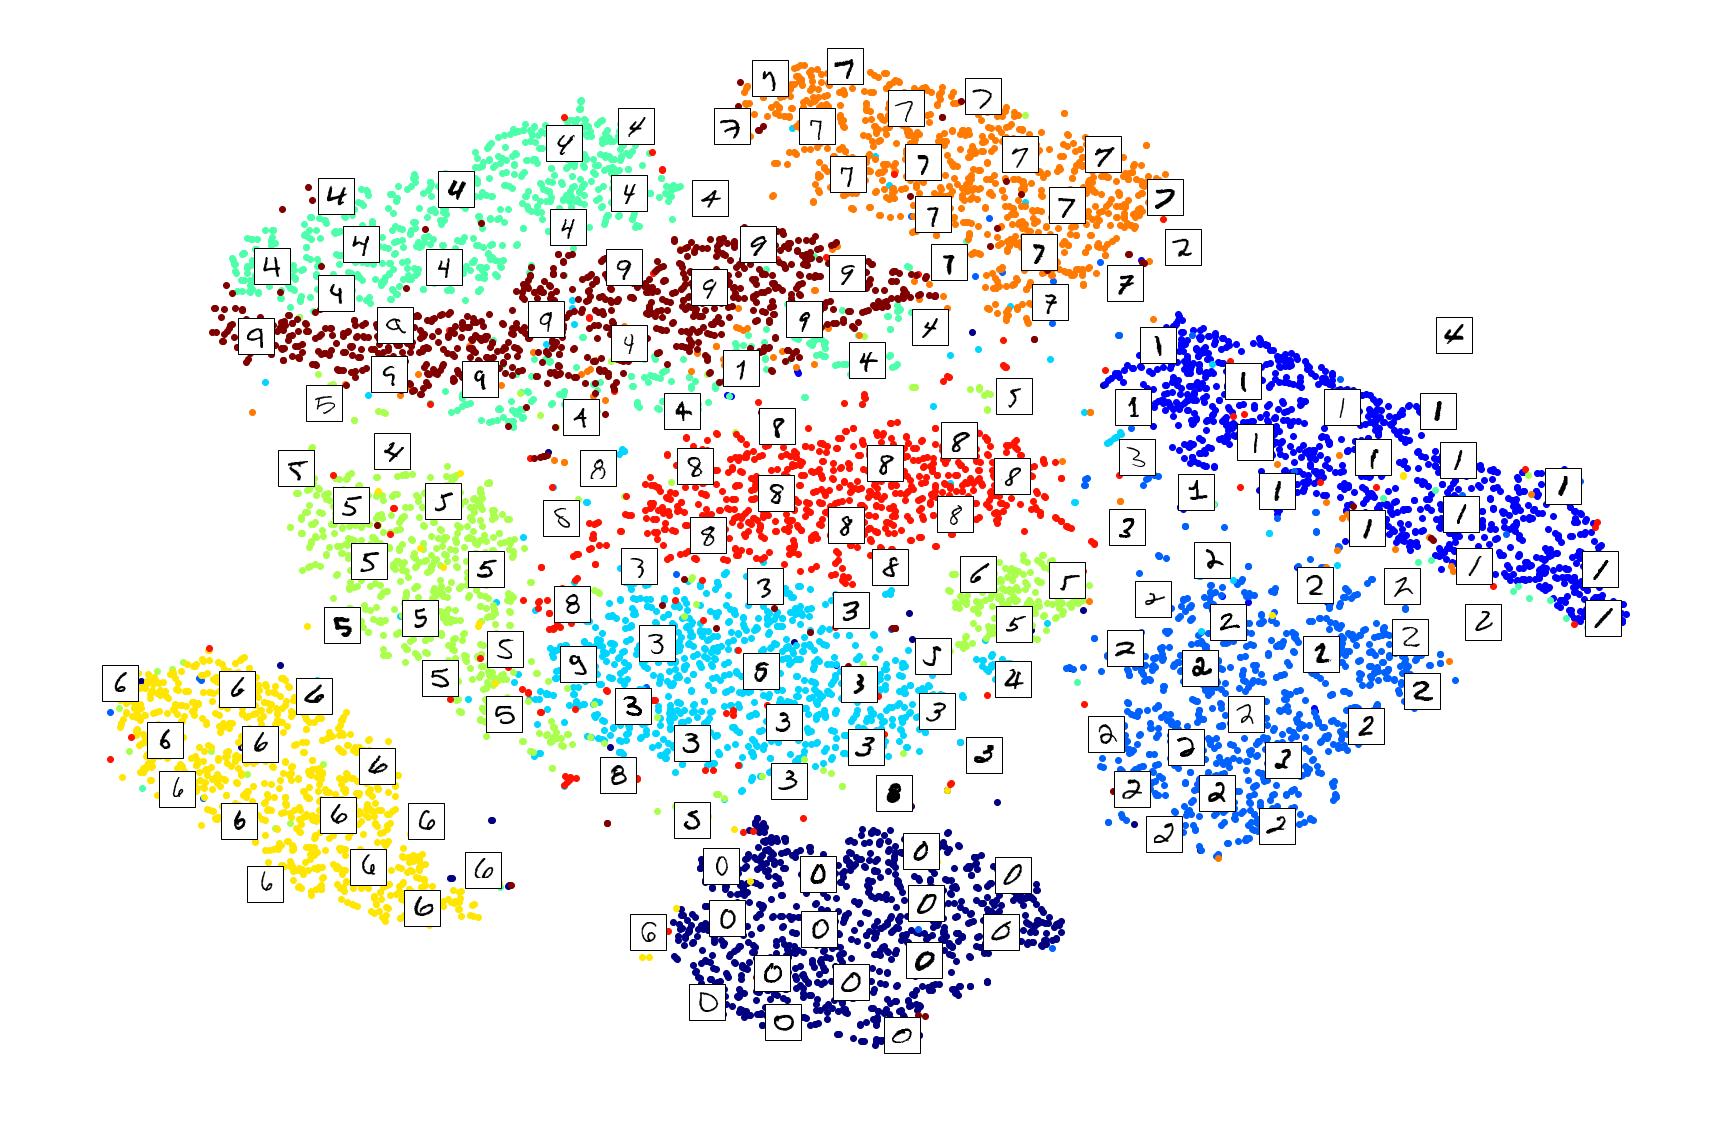

In [16]:
plot_digits(X_reduced, y, images = X, figsize=(30, 20))

Try other dimension reduction method and time how long does it take.

In [17]:
# PCA
from sklearn.decomposition import PCA
import time
t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=22).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))

PCA took 0.4s.


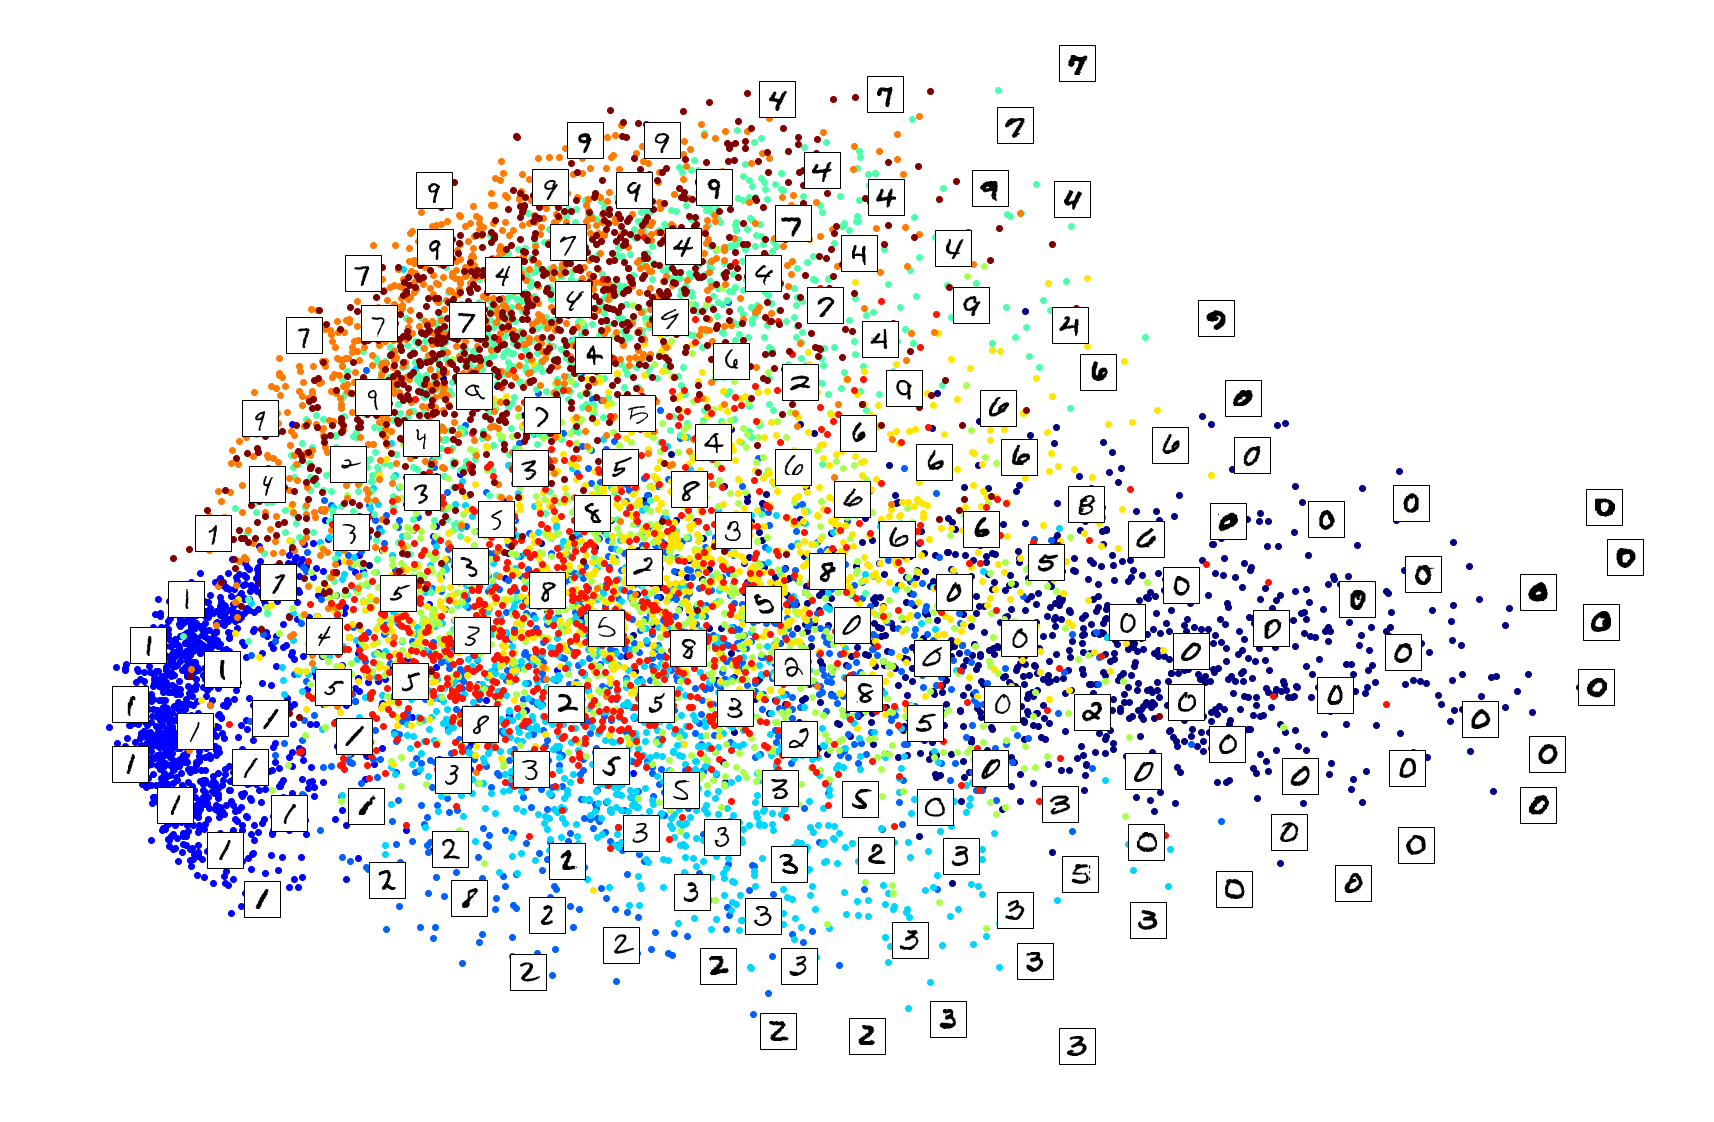

In [18]:
plot_digits(X_pca_reduced, y, images = X, figsize=(30, 20))
plt.show()

In [19]:
# LLE
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=22).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))

LLE took 134.2s.


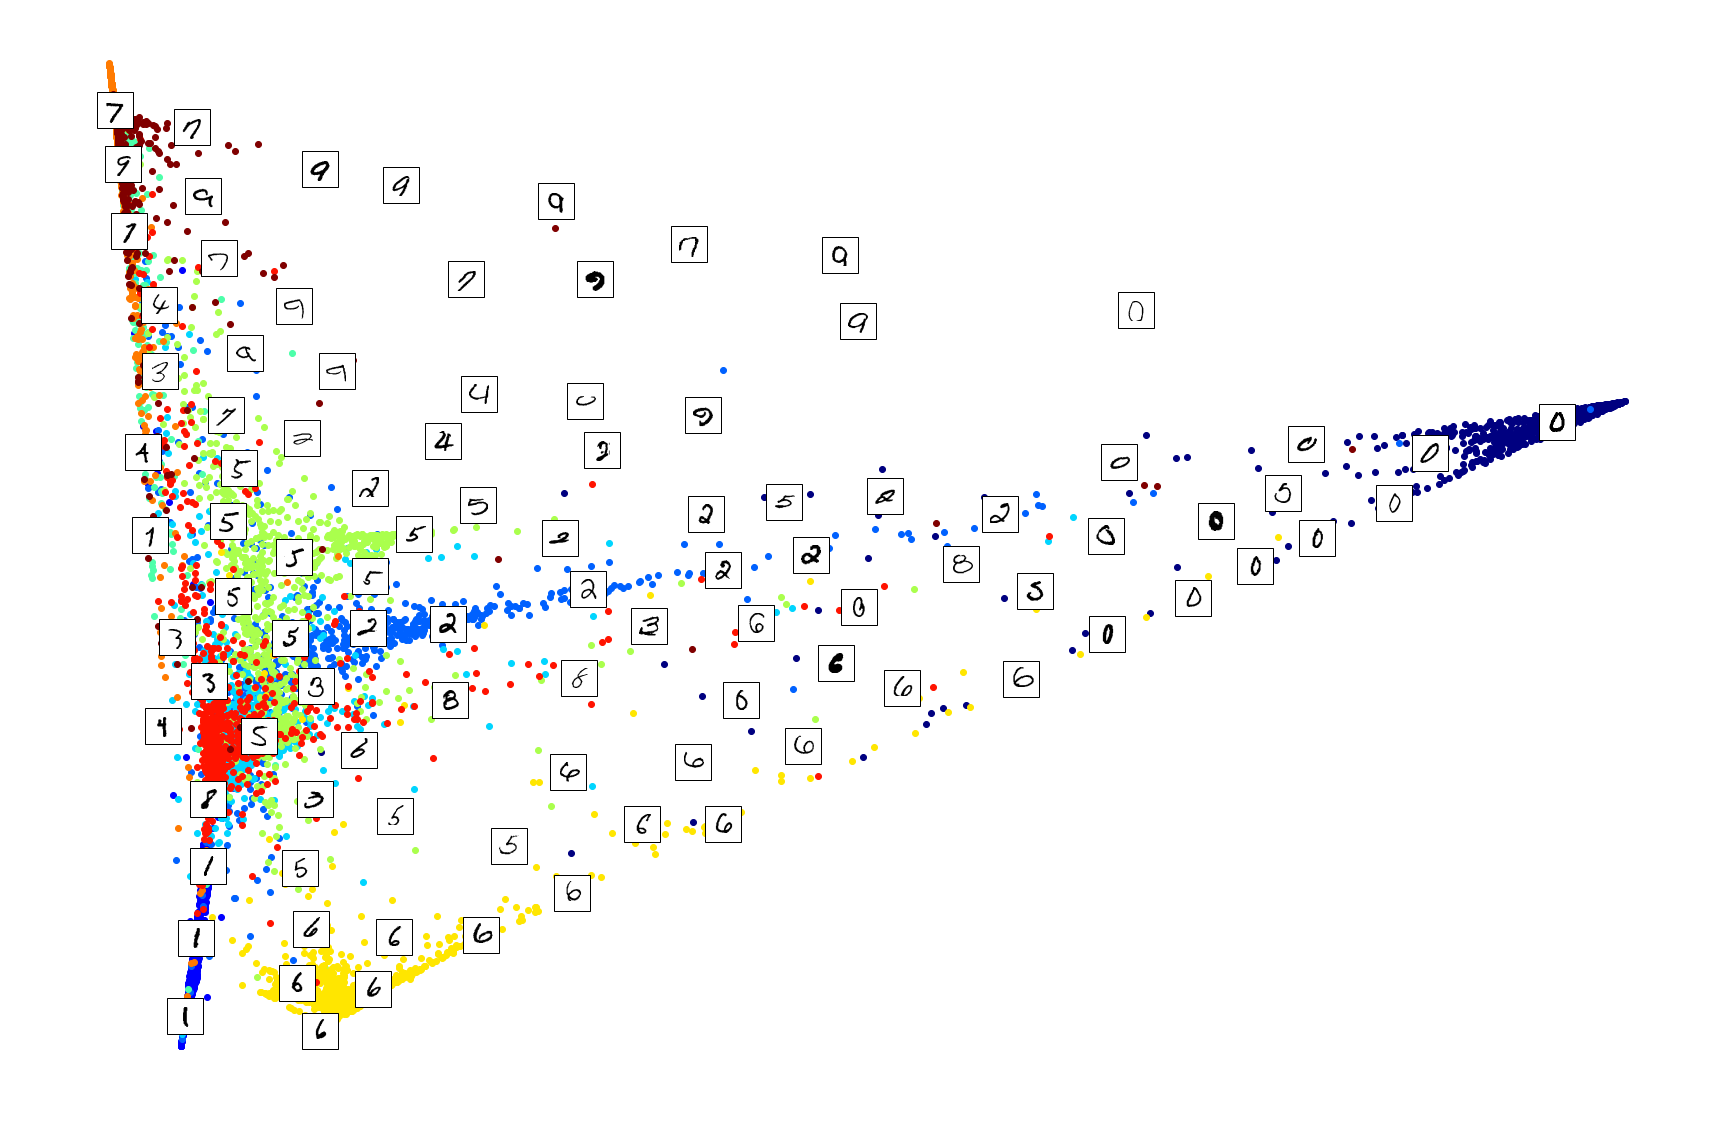

In [20]:
plot_digits(X_lle_reduced, y, images = X, figsize=(30, 20))
plt.show()

MDS took 157.1s (on just 2,000 MNIST images instead of 10,000).


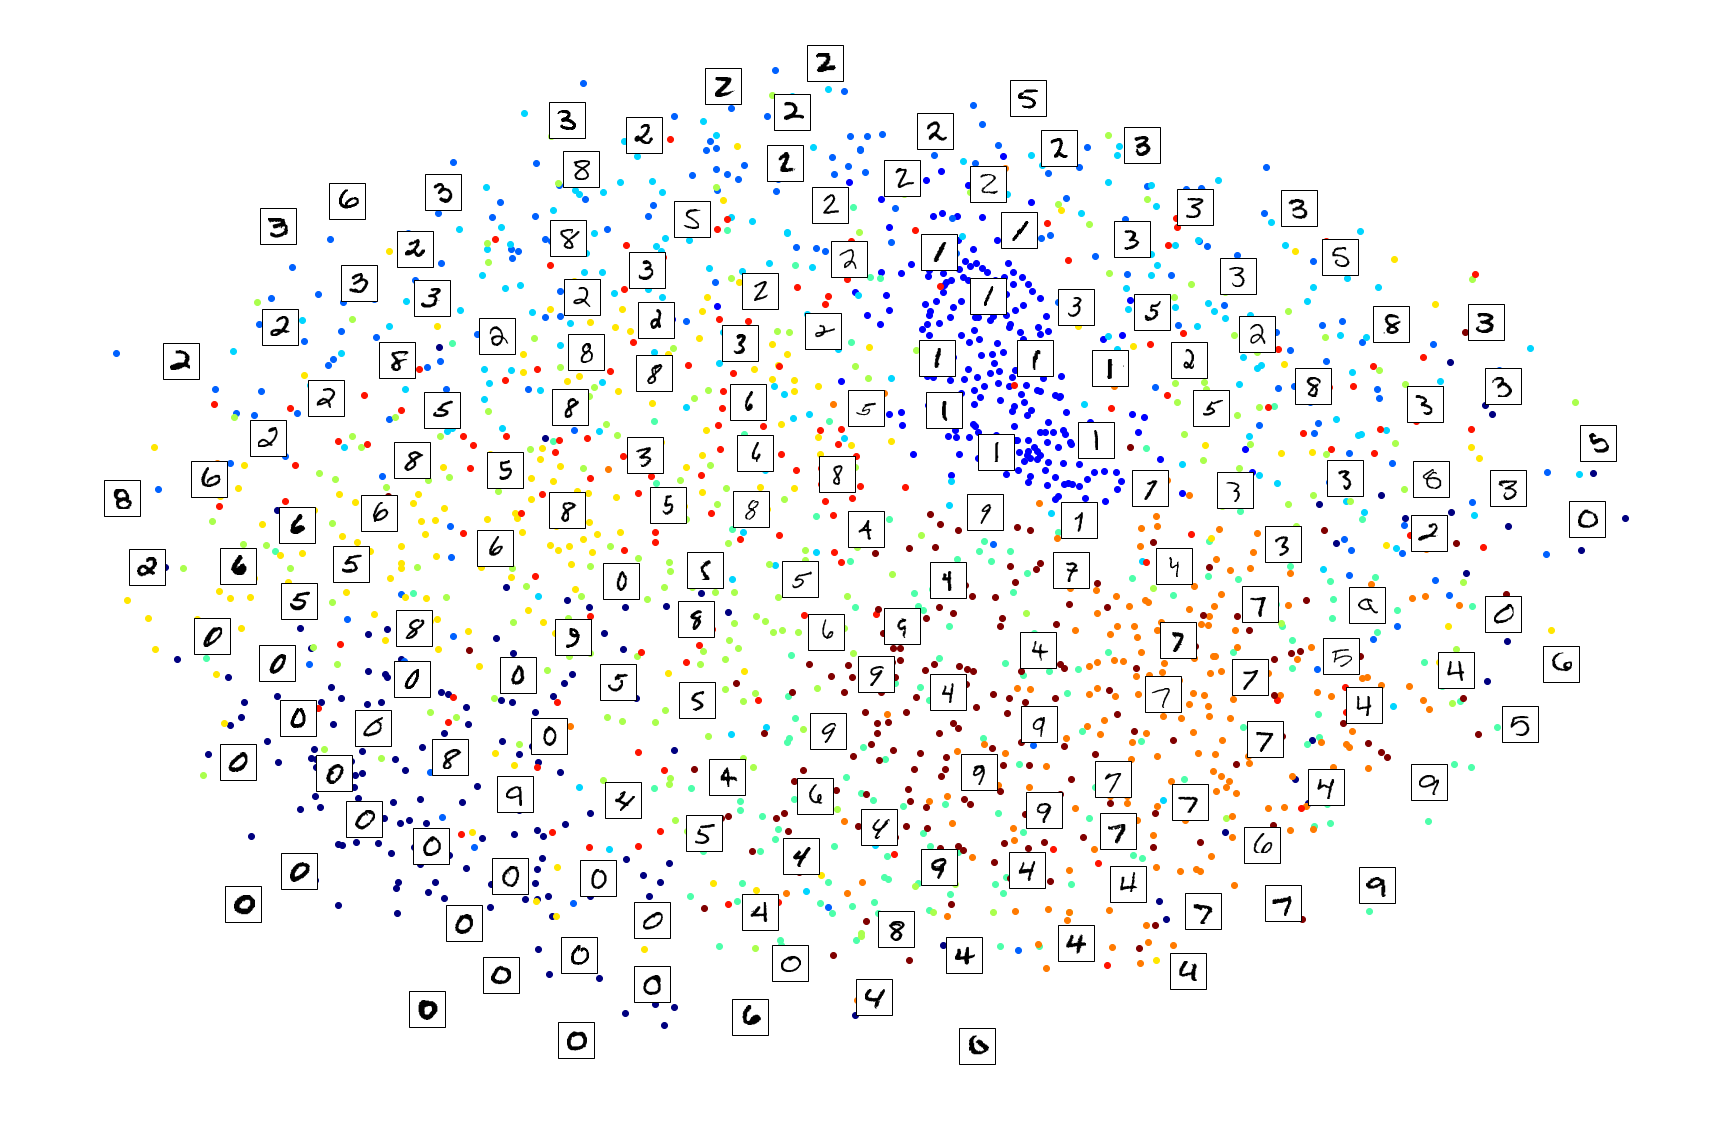

In [22]:
# MDS
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=22).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))

plot_digits(X_mds_reduced, y[:m], images = X, figsize=(30, 20))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 2.5s.


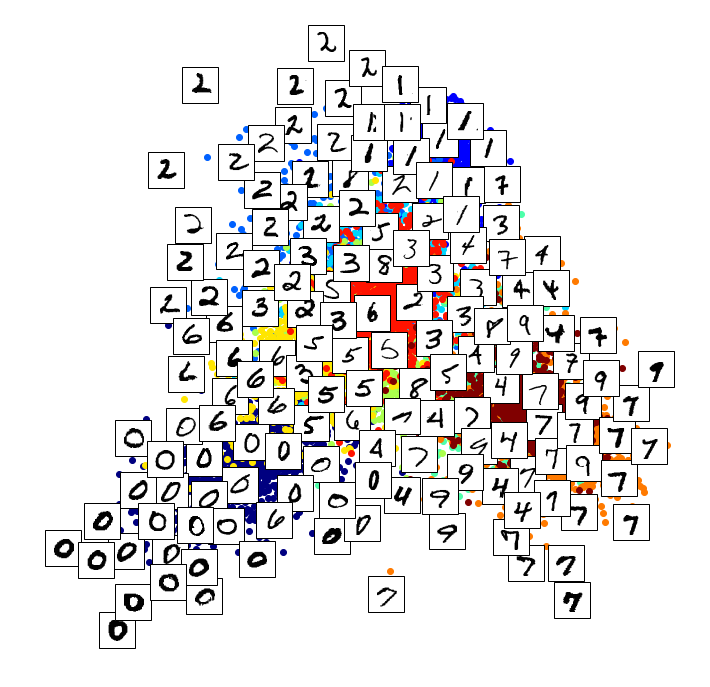

In [23]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))

plot_digits(X_lda_reduced, y, images = X, figsize=(12,12))
plt.show()

Well, it's pretty clear that t-SNE won this little competition, in the reduced dataset, numbers can be easily distinguishable from others.

t-SNE took 394.4s.


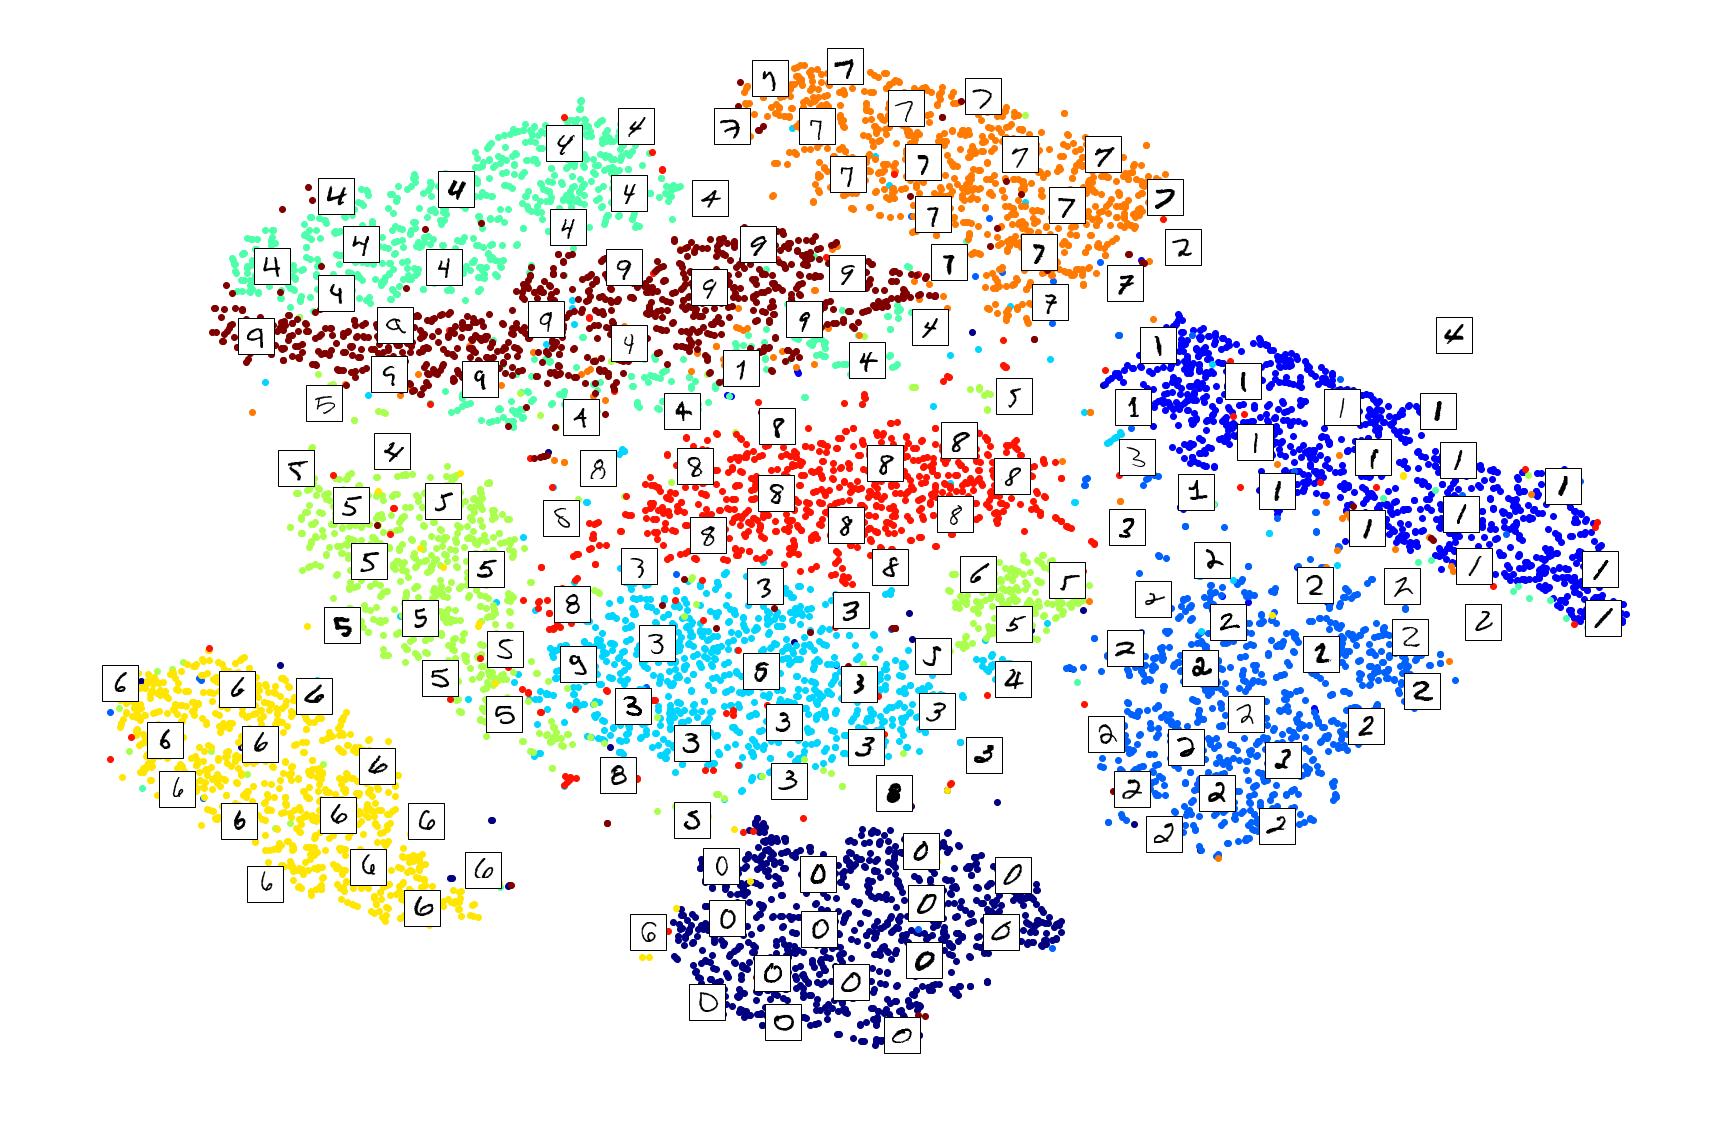

In [24]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=22).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y, images = X, figsize=(30,20))
plt.show()

PCA and t-SNE took 309.7s.


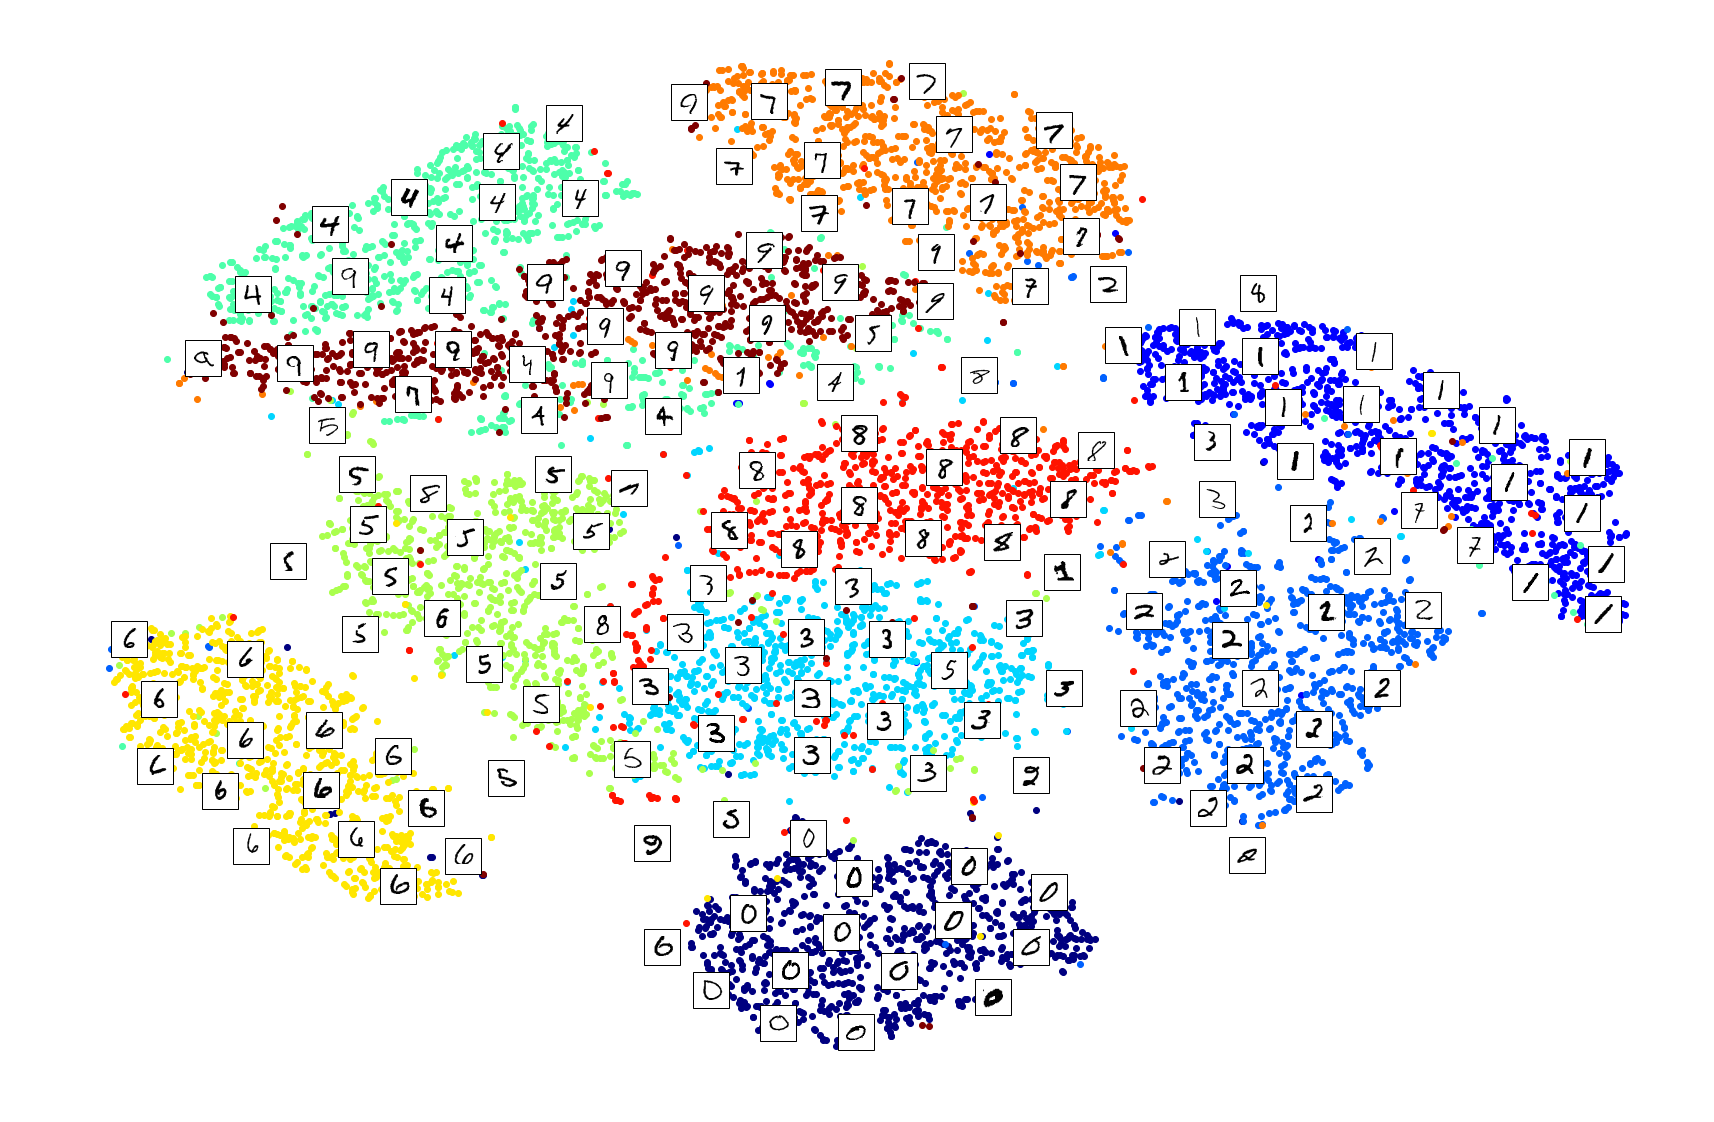

In [25]:
from sklearn.pipeline import Pipeline
pca_tsne = Pipeline([
    ('PCA', PCA(n_components = 0.95,random_state=22)),
    ('tSNE',TSNE(n_components=2, random_state=22)),
])
t0 = time.time()
X_pca_tsne_reduced=pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA and t-SNE took {:.1f}s.".format(t1 - t0))

plot_digits(X_pca_tsne_reduced, y, images = X, figsize=(30,20))
plt.show()

Yes, PCA roughly gave us a 25% speedup, without damaging the result